In [51]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from datetime import datetime,date,timedelta
import seaborn as sns
import os, warnings
from scipy.signal import savgol_filter
%matplotlib inline
warnings.filterwarnings('ignore')
cutOffYear = '1850'

In [7]:
ctrTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')
continents = ['North America','South America','Europe','Asia','Africa','Australia','Antarcita']

In [10]:
continentTemp = ctrTemp[ctrTemp['Country'].isin(continents)]
continentTemp = continentTemp.dropna()
# print(len(countryTemp))
# print(len(continentTemp))
countryTemp = ctrTemp[~ctrTemp['Country'].isin(continents)]
countryTemp = countryTemp.dropna()
countryTemp['Year'] = countryTemp['dt'].apply(lambda x : x[:4])
# print(len(countryTemp))
# continentTemp.head()

In [53]:
#trimming for quality data
countryTemp = countryTemp[countryTemp['Year'] >= cutOffYear]

In [54]:
countryTemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
1274,1850-01-01,-9.083,1.834,Åland,1850
1275,1850-02-01,-2.309,1.603,Åland,1850
1276,1850-03-01,-4.801,3.033,Åland,1850
1277,1850-04-01,1.242,2.008,Åland,1850
1278,1850-05-01,7.920,0.881,Åland,1850


In [55]:
countryTempAvg = countryTemp.groupby(['Country','Year']).mean().reset_index(drop=False)
countryTempAvg.head()

,Country,Year,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,1850,13.326083,1.961917
1,Afghanistan,1851,13.605667,2.048500
2,Afghanistan,1852,13.541167,2.253833
3,Afghanistan,1853,13.455833,2.112833
4,Afghanistan,1854,13.605750,2.213333


In [56]:
test = countryTempAvg[countryTempAvg['Country'] == 'United States']
test2 = test[['Year']+['AverageTemperature']]
test2 = test2.groupby('Year').mean()
test2.head()

# test2['PctChange'] = test2.groupby(level=0).pct_change(1)
# test2.head(10)

zoo = test2.pct_change(5)
zoo = zoo.dropna().reset_index(drop=False)
zoo.head(10)

,Year,AverageTemperature
0,1855,0.025591
1,1856,-0.082501
2,1857,-0.005224
3,1858,-0.005565
4,1859,-0.091191
5,1860,0.014363
6,1861,0.089038
7,1862,0.009050
8,1863,0.003972
9,1864,0.045436


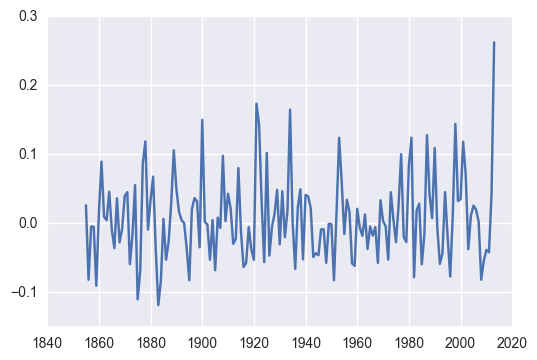

In [57]:
plt.plot(zoo['Year'],zoo['AverageTemperature'])